In [1]:
from labtools import scanner, assign_trigs_to_clicks, get_trig_len, get_dump, USER, LOC, correlation, shift_channels
from labtools import plot_style
import numpy as np
from matplotlib import pyplot as plt
import os

In [12]:
from scipy.signal import find_peaks

from labtools import scanner
from scipy.optimize import curve_fit

In [6]:
from ipywidgets import RadioButtons, Layout
from IPython.display import display
from ipywidgets import HBox, VBox
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [2]:
folder = '/home/bbuusshh/my_git/data/24/ExpI'

In [3]:
os.listdir(folder)

['Molecule0001',
 'Molecule0004',
 'Molecule0009',
 'Molecule0002',
 'Molecule0003',
 'Molecule0005',
 'Molecule0000',
 'Molecule0011',
 'Molecule0007',
 'Molecule0010',
 'Molecule0013',
 'Molecule0008',
 'Molecule0006',
 'Molecule0012']

In [4]:
SCANS_PATH = folder

scans = os.listdir(SCANS_PATH)

imgs = []
for scan in scans:
    header, raw, freq = scanner.xtract(f"{SCANS_PATH}/{scan}")
    imgs.append(raw)

In [7]:
def plot_imgs(scan):
    plt.imshow(imgs[scan], aspect='auto')
    
interact(
    plot_imgs, 
    scan = widgets.RadioButtons(
    options=range(len(scans)),
    description='Scans:',
    disabled=False,
))

interactive(children=(RadioButtons(description='Scans:', options=(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13…

<function __main__.plot_imgs(scan)>

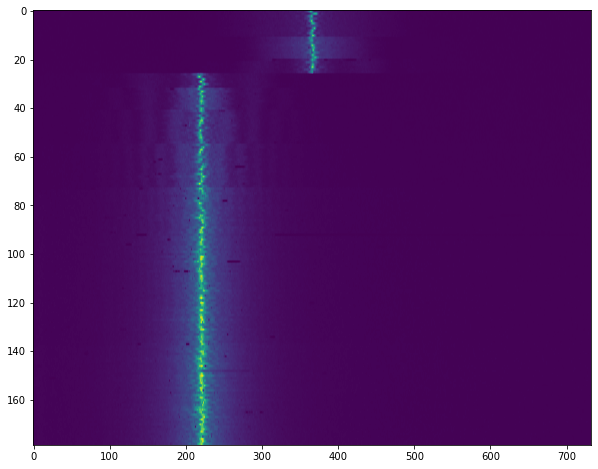

In [11]:
plt.figure(figsize=(10, 8))
plt.imshow(imgs[9], aspect='auto')

In [13]:
peak_distance_param=0.5
peak_height_param=0.4

In [15]:
img = imgs[9]

In [16]:
center = int(len(img[0])/2)

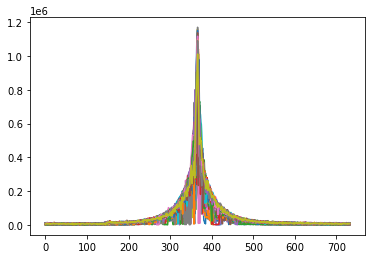

In [46]:
img_a = np.zeros(len(img[0]))
line0 = img[1]
peaks, _ = find_peaks(line0/np.max(line0), height=peak_height_param, distance=len(line0)*peak_distance_param) 
pk = peaks[line[peaks].argmax()]
fr = np.arange(len(line0))
sh = center - pk
line0 = np.roll(line0, sh)

for line in img:
    peaks, _ = find_peaks(line/np.max(line), height=peak_height_param, distance=len(line)*peak_distance_param) 
    pk = peaks[line[peaks].argmax()]
    fr = np.arange(len(line))
#     try:
#         popt, pcov =curve_fit(scanner.lorentz, fr, line, p0=[100,10,pk,100])
#         perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
#         tot_err = perr.sum()
#         pk = int(popt[2])
#     except:
#         print("skip")
#         continue
    sh = center - pk
    line = np.roll(line, sh) #- line0
    img_a = np.vstack((img_a, line))
    plt.plot(fr, line)

In [47]:
from matplotlib import cm

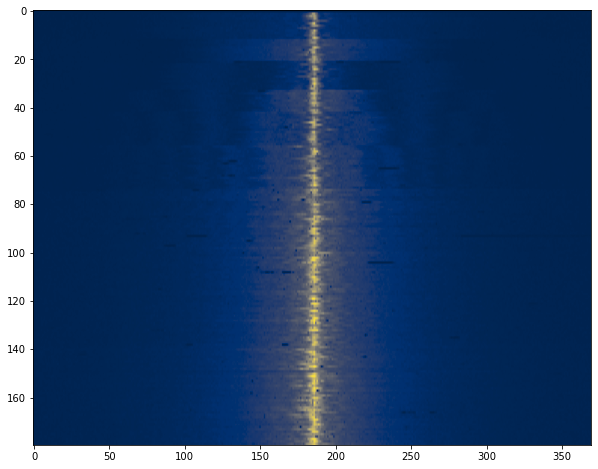

In [52]:
plt.figure(figsize=(10, 8))
plt.imshow(img_a[:,180:550], aspect='auto', cmap=cm.cividis)
plt.savefig('freq_detuned_rabi.png')